<a href="https://colab.research.google.com/github/dnlsoroka/FeatureEnginnering_Titanic/blob/main/Feature_Engineering_Titanic_Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Get the Titanic Dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
train=pd.read_csv('/content/drive/My Drive/train.csv')
test=pd.read_csv('/content/drive/My Drive/test.csv')


In [ ]:
train.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **Merge the Train and the Test set**

In [ ]:
# Create a combined dataset to introduce new features
# remove the survived column from train dataset and merge with test dataset

train_1=train
test_1=test

# create a sub-dataset for submission file and saving it

Passenger_Ids = test['PassengerId']




In [ ]:
combined=train_1.append(test_1, ignore_index = True) # append test to train

combined.shape

(1309, 12)

In [ ]:
combined.info() # tests survived are null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


In [ ]:
combined.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# ***Feature Engineering***
Worksheet  – Feature Engineering
Note: You have to modify the file provided to you.

1.  We discussed how to extract the titles of the passengers. Use a similar approach to extract the
last names of the passengers.
2.  Add the column ‘FamilySize’ to the dataset which should be the sum of the ‘Parch’ and ‘SibSp’
column.
a.  Perform cross validation and report the mean accuracy and standard deviation.
b.  Plot the feature importance graph. What is the importance of the FamilySize feature?

In [ ]:
name_0 = combined.Name[351]

name_0


'Williams-Lambert, Mr. Fletcher Fellows'

In [ ]:
name_0.split(',')[1].split('.')[0].strip()

'Mr'

In [ ]:
name_0.split(',')[0].strip() #last name

'Williams-Lambert'

In [ ]:
# WORKSHEET Q 1
combined['Last'] = combined.Name.apply(lambda name: name.split(',')[0].strip())
combined['Last'].value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: Last, Length: 875, dtype: int64

In [ ]:
#combined['Last'] = combined.Name.apply(lambda name: name_0.split('.')[1].split(' ')[2].strip())
#combined['Last'].value_counts()

Fellows    1309
Name: Last, dtype: int64

In [ ]:
# Feature : Title of the passengers

combined['Title'] = combined.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

combined['Title'] = combined['Title'].replace(to_replace =["Mlle", "Ms","Mme"],value ="Miss")

combined['Title'] = combined['Title'].replace(to_replace =['Capt', 'Don', 'Major', 'Sir','Col','Dr','Rev','Dona', 'Lady','Jonkheer', 'the Countess'],value ="noble")

combined['Title'].value_counts()


Mr        757
Miss      265
Mrs       197
Master     61
noble      29
Name: Title, dtype: int64

In [ ]:
# Recover the train and test set back

train=combined[0:890]
test=combined[891:1309]

# drop the Survived column from the test set

test.drop(["Survived"], 1, inplace=True)


<ipython-input-27-a3da44ff6a76>:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test.drop(["Survived"], 1, inplace=True)
/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Last         418 non-null    object 
 12  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(7)
memory usage: 42.6+ KB


# **Preprocessing Train Dataset**
Worksheet #2

In [ ]:
# Cleanup and Impute Missing Values ##already dropepd

train.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

train.Age = train.Age.fillna(np.round(np.mean(train.Age),1))

train.Embarked = train.Embarked.fillna(train.Embarked.mode()[0])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    float64
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    object 
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Embarked  890 non-null    object 
 8   Last      890 non-null    object 
 9   Title     890 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 69.7+ KB


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Last,Title
0,0.0,3,male,22.0,1,0,7.2500,S,Braund,Mr
1,1.0,1,female,38.0,1,0,71.2833,C,Cumings,Mrs
2,1.0,3,female,26.0,0,0,7.9250,S,Heikkinen,Miss
3,1.0,1,female,35.0,1,0,53.1000,S,Futrelle,Mrs
4,0.0,3,male,35.0,0,0,8.0500,S,Allen,Mr


In [ ]:
categories = ['Sex','Pclass','Embarked', 'Last'] #2 Added Last

codes = {}
for col in categories:
    values = sorted(list(train[col].unique()))
    mapper = dict(zip(values, range(len(values))))
    codes[col] = mapper
    train[col] = train[col].replace(mapper)

<ipython-input-33-bd9255034bbb>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col] = train[col].replace(mapper)


In [ ]:
codes

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  890 non-null    float64
 1   Pclass    890 non-null    int64  
 2   Sex       890 non-null    int64  
 3   Age       890 non-null    float64
 4   SibSp     890 non-null    int64  
 5   Parch     890 non-null    int64  
 6   Fare      890 non-null    float64
 7   Embarked  890 non-null    int64  
 8   Last      890 non-null    int64  
 9   Title     890 non-null    object 
dtypes: float64(3), int64(6), object(1)
memory usage: 69.7+ KB


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Last,Title
0,0.0,2,1,22.0,1,0,7.2500,2,73,Mr
1,1.0,0,0,38.0,1,0,71.2833,0,136,Mrs
2,1.0,2,0,26.0,0,0,7.9250,2,250,Miss
3,1.0,0,0,35.0,1,0,53.1000,2,197,Mrs
4,0.0,2,1,35.0,0,0,8.0500,2,11,Mr


In [ ]:
for col in categories:
  train[col]=train[col].astype("category")

<ipython-input-28-321f174adef6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train[col]=train[col].astype("category")


In [ ]:
train['Survived']=train['Survived'].astype("category")

<ipython-input-29-106d83375ac2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Survived']=train['Survived'].astype("category")


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890 entries, 0 to 889
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  890 non-null    category
 1   Pclass    890 non-null    category
 2   Sex       890 non-null    category
 3   Age       890 non-null    float64 
 4   SibSp     890 non-null    int64   
 5   Parch     890 non-null    int64   
 6   Fare      890 non-null    float64 
 7   Embarked  890 non-null    category
 8   Title     890 non-null    category
dtypes: category(5), float64(2), int64(2)
memory usage: 33.0 KB


In [ ]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0.0,2,1,22.0,1,0,7.2500,2,2
1,1.0,0,0,38.0,1,0,71.2833,0,3
2,1.0,2,0,26.0,0,0,7.9250,2,1
3,1.0,0,0,35.0,1,0,53.1000,2,3
4,0.0,2,1,35.0,0,0,8.0500,2,2


In [ ]:
X_train = train.iloc[:,1:] # feature

y_train = train.iloc[:,0]

# **Preprocessing Test Dataset**

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
891,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,Mr
892,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,Mrs
893,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,Mr
894,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,Mr
895,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,Mrs


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Title        418 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 39.3+ KB


In [ ]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64

We will drop the passenger column and impute the Age and Fare column

In [ ]:
# Cleanup and Impute Missing Values

Passenger_Ids = test['PassengerId']

test.drop(['PassengerId', 'Ticket', 'Name', 'Cabin'], axis=1, inplace=True)

test.Age = test.Age.fillna(np.round(np.mean(test.Age),1))

test.Fare = test.Fare.fillna(np.round(np.mean(test.Fare),1))


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
#
categories = ['Sex','Pclass','Embarked', 'Title']
codes = {}
for col in categories:
    values = sorted(list(test[col].unique()))
    mapper = dict(zip(values, range(len(values))))
    codes[col] = mapper
    test[col] = test[col].replace(mapper)

<ipython-input-37-ec943175d7df>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col] = test[col].replace(mapper)


In [ ]:
codes

{'Sex': {'female': 0, 'male': 1},
 'Pclass': {1: 0, 2: 1, 3: 2},
 'Embarked': {'C': 0, 'Q': 1, 'S': 2},
 'Title': {'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'noble': 4}}

In [ ]:
codes['Survived'] = {'dead':0, 'survived':1}

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    int64  
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    int64  
 7   Title     418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.3 KB


In [ ]:
for col in categories:
  test[col]=test[col].astype("category")

<ipython-input-41-e80d4405bfcf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test[col]=test[col].astype("category")


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 891 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    418 non-null    category
 1   Sex       418 non-null    category
 2   Age       418 non-null    float64 
 3   SibSp     418 non-null    int64   
 4   Parch     418 non-null    int64   
 5   Fare      418 non-null    float64 
 6   Embarked  418 non-null    category
 7   Title     418 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 15.4 KB


In [ ]:
X_test = test

# **Decision Tree Model**

In [ ]:
############################# Build Decision Tree

from sklearn import tree


dtc = tree.DecisionTreeClassifier(max_depth = 4,
                                  random_state=1,
                                  criterion='gini',
                                  min_samples_leaf=4,
                                  min_samples_split = 2,
                                  max_features = 5)

dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, max_features=5, min_samples_leaf=4,
                       random_state=1)

In [ ]:
# Make predictions

y_predict = dtc.predict(X_test)

y_predict_prob = dtc.predict_proba(X_test)

In [ ]:
dtc

DecisionTreeClassifier(max_depth=4, max_features=5, min_samples_leaf=4,
                       random_state=1)

## **Cross Validation (10-fold)**

In [ ]:
#################### Evaluate Model Performance using Cross validation

from sklearn.model_selection import cross_val_score


In [ ]:
scores = cross_val_score(dtc, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.75280899 0.83146067 0.7752809  0.85393258 0.83146067 0.80898876
 0.83146067 0.78651685 0.86516854 0.84269663]
Mean: 0.8179775280898876
Standard Deviation: 0.03437541245118732


## ***Feature Importance***

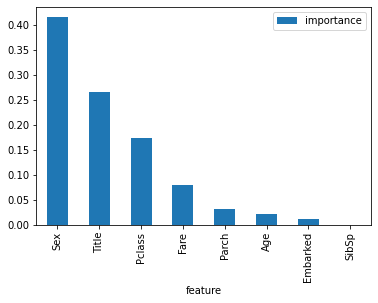

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(dtc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances
importances.plot.bar()



## **Kaggle Submission for Improved DT**

In [ ]:
########################### Prepare Submission file for Kaggle

result = pd.DataFrame({ "PassengerId" : Passenger_Ids, "Survived": y_predict.astype(int) })
result.to_csv("solution-3-DT-Feature-Engineering.csv", index=False) # write the final dataset to a csv file.

# When we submit this to Kaggle we get a score of ~ 77.99%


# **Grid Search**

In [ ]:

######################### Do a Grid Search to find Optimum params

param_grid = { "criterion" : ["entropy", "gini"]
, "max_features" : list(range(4,9))
, "max_depth" : [4,5,6,7]
, "min_samples_leaf" : [2, 3, 4, 5]
, "min_samples_split" : [2, 3, 4, 5]}


In [ ]:

from sklearn.model_selection import GridSearchCV

dtc_grid = tree.DecisionTreeClassifier(random_state=1)

clf = GridSearchCV(estimator=dtc_grid, param_grid=param_grid, cv=10, n_jobs=-1)

clf.fit(X_train, y_train)


In [ ]:

print(clf.best_params_)
print(clf.best_score_)
print(clf.best_estimator_)

In [ ]:

#make predictions using best model

clf.best_estimator_.predict(X_test)

In [ ]:

scores_2 = cross_val_score(clf.best_estimator_, X_train, y_train, cv=10, scoring = "accuracy")

print("Scores:", scores_2)
print("Mean:", scores_2.mean())
print("Standard Deviation:", scores_2.std())

### **Kaggle Submission for Improved DT**

In [ ]:
# Make predictions on the Kaggle test dataset


predictions_kaggle = clf.best_estimator_.predict(X_test)

In [ ]:
########################### Prepare Submission file for Kaggle


result = pd.DataFrame({ "PassengerId" : Passenger_Ids, "Survived": predictions_kaggle.astype(int) })
result.to_csv("solution-4-GridSearch.csv", index=False) # write the final dataset to a csv file.


